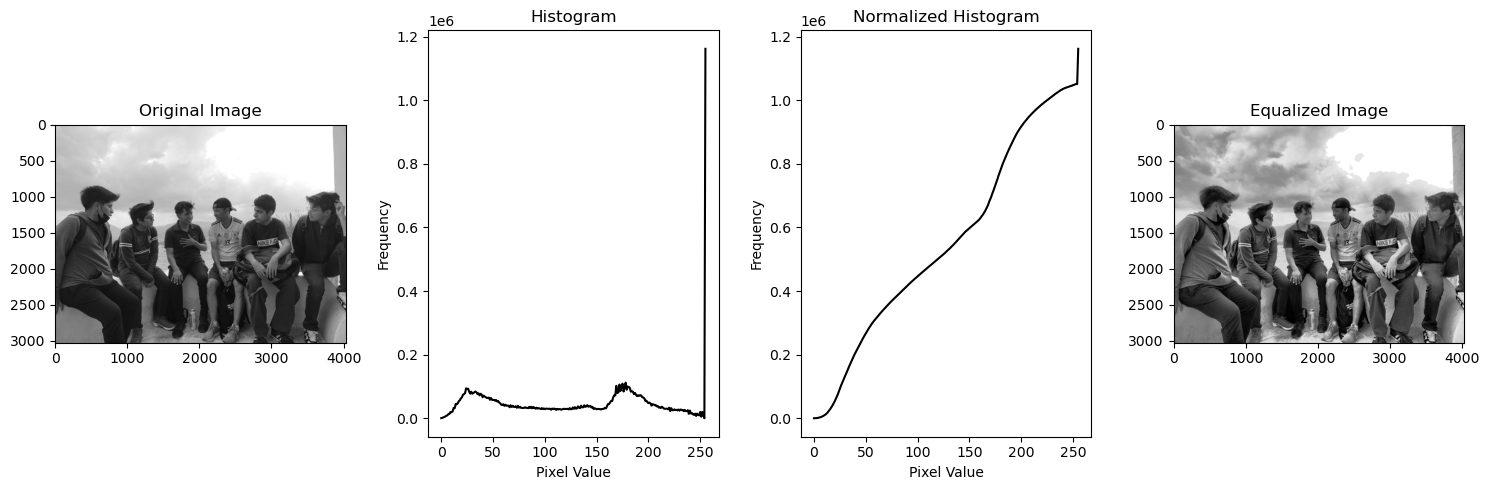

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('fullgays.jpeg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_nueva = clahe.apply(img)

histogram, _ = np.histogram(img_nueva.flatten(), 256, [0, 256])
cumulative_distribution = histogram.cumsum()
normalized_histogram = cumulative_distribution * histogram.max() / cumulative_distribution.max()  # resultante de la funcion integral
img_equalized = cv2.equalizeHist(img_nueva)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.plot(histogram, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.plot(normalized_histogram, color='black')
plt.title('Normalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()


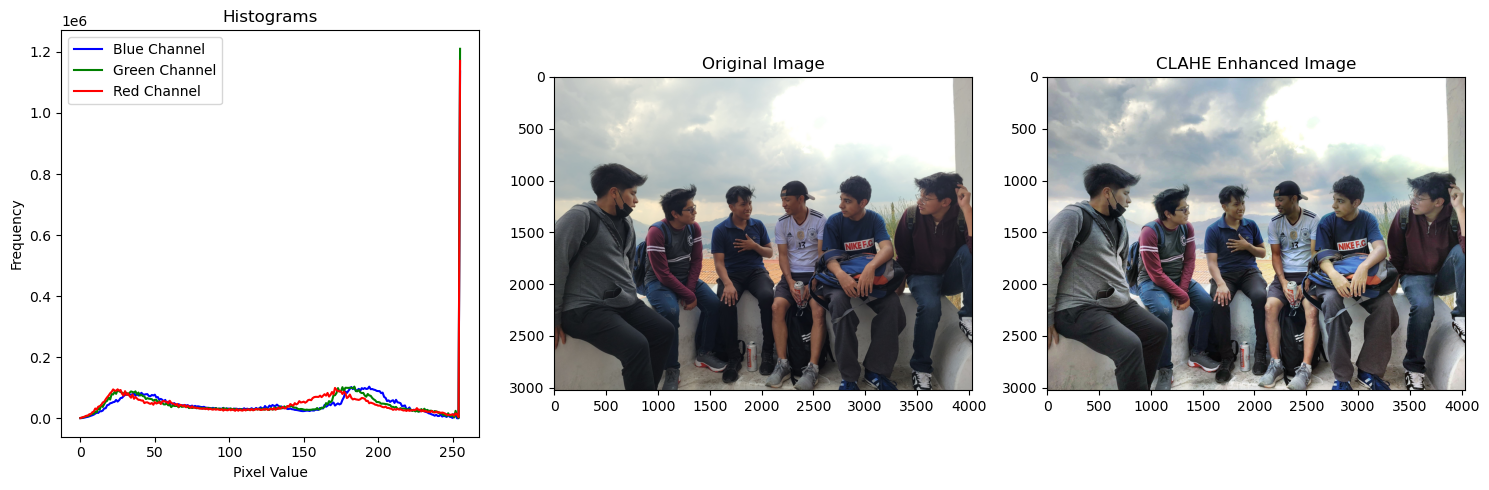

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('fullgays.jpeg')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Apply CLAHE to each color channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
b_clahe = clahe.apply(b)
g_clahe = clahe.apply(g)
r_clahe = clahe.apply(r)

# Merge the CLAHE-enhanced color channels back into a color image
img_clahe = cv2.merge((b_clahe, g_clahe, r_clahe))

# Calculate histograms for the CLAHE-enhanced image
hist_b, _ = np.histogram(b_clahe.flatten(), 256, [0, 256])
hist_g, _ = np.histogram(g_clahe.flatten(), 256, [0, 256])
hist_r, _ = np.histogram(r_clahe.flatten(), 256, [0, 256])

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_b, color='blue')
plt.plot(hist_g, color='green')
plt.plot(hist_r, color='red')
plt.title('Histograms')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(['Blue Channel', 'Green Channel', 'Red Channel'])

# Display the original and CLAHE-enhanced images
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.title('CLAHE Enhanced Image')

plt.tight_layout()
plt.show()
